## Reading Library

In [1]:
import numpy as np                        ## Main Library
import pandas as pd                       ## Main Library
import matplotlib.pyplot as plt           ## Plotting Graphs
%matplotlib inline
from patsy import dmatrices                
import sklearn                            ## Used for Building model
import seaborn as sns                     ## Statistical plotting
import statsmodels.api as sm              ##Statistical Features
from scipy import stats
import warnings                           ## Remove warnings
warnings.filterwarnings("ignore")
from scipy.special import factorial

In [277]:
## Importing Data
df=pd.read_csv("Data3.csv")
df.head()

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker,Perf+vintage
0,93.47,7157.0,33.0,Y,1.0,10000000.0,HDFC BANK,bangalore,Tier I,"(6.999, 33.0]",...,10000000,North 1,18,7,7,Delhi,Delhi,1,NN,3084.51
1,81.59,25000.0,42.0,N,3.0,145501.0,HDFC BANK,others,Tier III,"(41.0, 50.0]",...,145501,West,18,3,31,Ahmedabad,Ahmedabad,1,NN,3426.78
2,87.58,35000.0,35.0,Y,2.0,800000.0,Ex-HDFC,jaipur,Tier II,"(50.0, 66.0]",...,1600000,North 2,18,6,9,Jaipur,Jaipur,1,NN,3065.30
3,80.18,100000.0,12.0,Y,2.0,1000000.0,HDFC BANK,jaipur,Tier II,"(6.999, 33.0]",...,2000000,North 2,18,2,21,Jaipur,Mumbai,1,NN,962.16
4,97.19,15000.0,45.0,Y,2.0,300000.0,HDFC BANK,others,Tier III,"(33.0, 41.0]",...,165000,West,18,6,6,others,others,1,NN,4373.55


In [278]:
## Display all column names
names = df.columns.values 
print(names)

['Mapped Agent 13M Persistency' "Applicant's Policy Annualized Premium"
 'Mapped Agent Vintage' 'Auto Debit of Premium Opted Flag(Yes/No)'
 'Application Life Assured BMI'
 'Total Risk Exposure of HDFC Life w.r.t. Life Assured'
 'Application  Sourcing Channel' 'Application  Life Assured City'
 'Application  Life Assured City Tier' 'Application  Life Assured Age'
 'Application  Life Assured Education' 'Application  Life Assured Gender'
 'Application  Life Assured Income' 'Application  Life Assured Industry'
 'Application  Life Assured Marital Status'
 'Application  Life Assured Occupation'
 "Applicant's Policy PAR/NON PAR/ULIP Tag"
 'Application Specific Sourcing Partner' 'First Premium Payment Type'
 "Applicant's Policy Product Category"
 "Applicant's Policy Premium Payment Frequency"
 "Applicant's Policy Product Name"
 "Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')"
 'Application Life Assured Residential Status'
 "Applicant's Policy Risk Cessation Term"
 "Applicant's Policy Rid

In [279]:
## Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25320 entries, 0 to 25319
Data columns (total 38 columns):
Mapped Agent 13M Persistency                             25320 non-null float64
Applicant's Policy Annualized Premium                    25320 non-null float64
Mapped Agent Vintage                                     25320 non-null float64
Auto Debit of Premium Opted Flag(Yes/No)                 25320 non-null object
Application Life Assured BMI                             25320 non-null float64
Total Risk Exposure of HDFC Life w.r.t. Life Assured     25320 non-null float64
Application  Sourcing Channel                            25320 non-null object
Application  Life Assured City                           25320 non-null object
Application  Life Assured City Tier                      25320 non-null object
Application  Life Assured Age                            25320 non-null object
Application  Life Assured Education                      25320 non-null object
Application  Life

In [280]:
## Standard Deviation of all attributes
df.std()

Mapped Agent 13M Persistency                             1.439343e+01
Applicant's Policy Annualized Premium                    7.173271e+04
Mapped Agent Vintage                                     1.803208e+01
Application Life Assured BMI                             1.631083e+00
Total Risk Exposure of HDFC Life w.r.t. Life Assured     4.910357e+06
Application  Life Assured Income                         1.486164e+06
Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')    3.064271e-01
Applicant's Policy Risk Cessation Term                   7.217959e+00
Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')     4.996883e-01
Applicant's Policy Sum Assured                           2.685334e+06
Application Login year                                   2.972338e-01
Application Login month                                  3.717016e+00
Application Login day                                    9.387921e+00
Target                                                   4.152279e-01
Perf+vintage        

## Label Encoding

In [281]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [282]:
df['Auto Debit of Premium Opted Flag(Yes/No)']= label_encoder.fit_transform(df['Auto Debit of Premium Opted Flag(Yes/No)']) 
df['Auto Debit of Premium Opted Flag(Yes/No)'].unique() 

array([1, 0])

In [283]:
df['Application  Sourcing Channel']= label_encoder.fit_transform(df['Application  Sourcing Channel']) 
df['Application  Sourcing Channel'].unique() 


array([2, 1, 0, 3, 4, 5, 6])

In [284]:
df['Application  Life Assured City']= label_encoder.fit_transform(df['Application  Life Assured City']) 
df['Application  Life Assured City'].unique() 

array([ 1, 10,  6, 11,  2,  9, 12,  4,  7,  0,  8,  5,  3, 13])

In [285]:
df['Application  Life Assured City Tier']= label_encoder.fit_transform(df['Application  Life Assured City Tier']) 
df['Application  Life Assured City Tier'].unique() 

array([0, 2, 1])

In [286]:
df['Application  Life Assured Education']= label_encoder.fit_transform(df['Application  Life Assured Education']) 
df['Application  Life Assured Education'].unique() 

array([ 4,  1,  0, 11,  6,  2,  3, 12,  7,  8,  5,  9, 10])

In [287]:
df['Application  Life Assured Gender']= label_encoder.fit_transform(df['Application  Life Assured Gender']) 
df['Application  Life Assured Gender'].unique()

array([0, 1])

In [288]:
df['Application  Life Assured Industry']= label_encoder.fit_transform(df['Application  Life Assured Industry']) 
df['Application  Life Assured Industry'].unique()

array([ 9, 10,  7,  8,  3,  2,  6,  1,  0,  4,  5])

In [289]:
df['Application  Life Assured Marital Status']= label_encoder.fit_transform(df['Application  Life Assured Marital Status']) 
df['Application  Life Assured Marital Status'].unique() 

array([2, 1, 3, 0])

In [290]:
df['Application  Life Assured Occupation']= label_encoder.fit_transform(df['Application  Life Assured Occupation']) 
df['Application  Life Assured Occupation'].unique() 

array([3, 4, 0, 2, 5, 6, 1])

In [291]:
df["Applicant's Policy PAR/NON PAR/ULIP Tag"]= label_encoder.fit_transform(df["Applicant's Policy PAR/NON PAR/ULIP Tag"]) 
df["Applicant's Policy PAR/NON PAR/ULIP Tag"].unique() 

array([0, 1, 2])

In [292]:
df['Application Specific Sourcing Partner']= label_encoder.fit_transform(df['Application Specific Sourcing Partner']) 
df['Application Specific Sourcing Partner'].unique() 

array([ 44,  46,  70,  80,  29,  95,  78,  73,  39,   9,  57,  45,  49,
        31,  85, 111, 122,  14,  90, 115,  12,   7,  10,  18,  24,  91,
        66,  51,  19, 109,   8, 102, 114,  77,  83,  22,  88, 108,  96,
        67,  41,  84,   3,  30, 107,  52,  20,  21, 116,  42,  47, 120,
        58,   0,  64, 118, 112,  94,  28, 110,  75,  36,  62,  74, 113,
       125, 121,  48,  65, 106, 103,  60,   6,  93,  71,  55, 119,  59,
       117,   4,  15,  27,  50,  11,   5, 124,  82,  54,  79,  16,  43,
        26,  53, 105,  86,  33,  97, 101, 104, 123,  72,  37,  25,  63,
        87,  92,  99,  56,  23,  61,  40,  35,  69,  34,   1,  89,  76,
        68,   2, 100,  32,  81,  98,  17,  38,  13])

In [293]:
df['First Premium Payment Type']= label_encoder.fit_transform(df['First Premium Payment Type']) 
df['First Premium Payment Type'].unique() 

array([4, 6, 1, 3, 7, 5, 8, 2, 0])

In [294]:
df["Applicant's Policy Product Category"]= label_encoder.fit_transform(df["Applicant's Policy Product Category"]) 
df["Applicant's Policy Product Category"].unique() 

array([2, 3, 1, 0])

In [295]:
df["Applicant's Policy Premium Payment Frequency"]= label_encoder.fit_transform(df["Applicant's Policy Premium Payment Frequency"]) 
df["Applicant's Policy Premium Payment Frequency"].unique() 

array([0, 2, 1, 3])

In [296]:
df["Applicant's Policy Product Name"]= label_encoder.fit_transform(df["Applicant's Policy Product Name"]) 
df["Applicant's Policy Product Name"].unique()

array([ 2,  7, 14,  4, 16,  1, 15, 17, 13,  6,  8, 10,  3,  9, 18,  5,  0,
       12, 11])

In [297]:
df['Application Life Assured Residential Status']= label_encoder.fit_transform(df['Application Life Assured Residential Status']) 
df['Application Life Assured Residential Status'].unique()

array([1, 0])

In [298]:
df['Application Life Assured State']= label_encoder.fit_transform(df['Application Life Assured State']) 
df['Application Life Assured State'].unique() 

array([ 3,  1,  8,  6,  5,  9,  4,  7, 10, 12,  0,  2, 11])

In [299]:
df['Application Sourcing Sub Channel']= label_encoder.fit_transform(df['Application Sourcing Sub Channel']) 
df['Application Sourcing Sub Channel'].unique() 

array([1, 3, 0, 2, 7, 6, 4, 5])

In [300]:
df['HDFC Life Operational Zone']= label_encoder.fit_transform(df['HDFC Life Operational Zone']) 
df['HDFC Life Operational Zone'].unique() 

array([1, 5, 2, 3, 4, 0])

In [301]:
df['Mapped Agent city']= label_encoder.fit_transform(df['Mapped Agent city']) 
df['Mapped Agent city'].unique() 

array([ 4,  0,  6, 10,  9,  3,  2,  7,  5,  8,  1])

In [302]:
df["Applicant's Policy Contract city"]= label_encoder.fit_transform(df["Applicant's Policy Contract city"]) 
df["Applicant's Policy Contract city"].unique() 

array([ 4,  0,  8, 10, 13, 11,  3,  2,  5,  9,  6,  7,  1, 12])

In [303]:
df["Application  Life Assured Age"]= label_encoder.fit_transform(df["Application  Life Assured Age"]) 
df["Application  Life Assured Age"].unique()

array([3, 1, 2, 0])

In [304]:
df["smoker_drinker"]= label_encoder.fit_transform(df["smoker_drinker"]) 
df["smoker_drinker"].unique()

array([0, 3, 2, 1])

In [306]:
df = df.drop('Perf+vintage', axis = 1)

In [307]:
df1 = df.copy()

In [308]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(df1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [309]:
df1 = scaler.transform(df1)

# PCA

In [310]:
from sklearn.decomposition import PCA

In [311]:
pca = PCA(n_components=4)

In [312]:
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [313]:
x_pca = pca.transform(df1)

Text(0, 0.5, 'Second Principal Component')

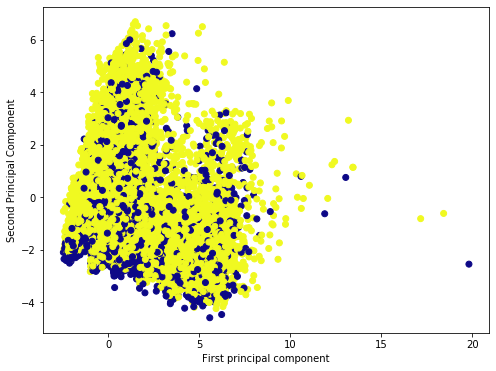

In [314]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [315]:
df_comp = pd.DataFrame(pca.components_,columns=df.columns)

In [316]:
df_comp

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker
0,0.013270,0.008575,-0.034425,-0.012656,0.036111,0.294358,0.086504,-0.108300,-0.155895,-0.004450,...,0.210008,0.373102,0.116954,-0.000886,0.016622,0.000646,-0.150329,-0.143757,0.006006,0.107840
1,0.043909,0.233320,0.029505,0.054533,0.017521,-0.012858,-0.093725,-0.422728,-0.389235,0.002943,...,-0.091897,-0.046843,0.076994,-0.020835,-0.001737,0.022993,-0.402318,-0.427389,0.078289,-0.032536
2,0.080975,0.362422,0.157976,0.272635,-0.024525,0.302912,-0.151558,0.120577,0.027495,-0.133745,...,-0.180471,0.294583,0.091329,-0.116767,0.121706,0.036837,0.256120,0.234097,0.278441,-0.011223
3,-0.121203,0.051310,-0.015310,-0.491709,-0.048612,0.178079,-0.234200,-0.063411,0.036480,-0.088046,...,-0.186469,0.178363,-0.115577,-0.110754,0.027421,-0.011684,-0.099258,-0.107529,-0.454745,0.171701


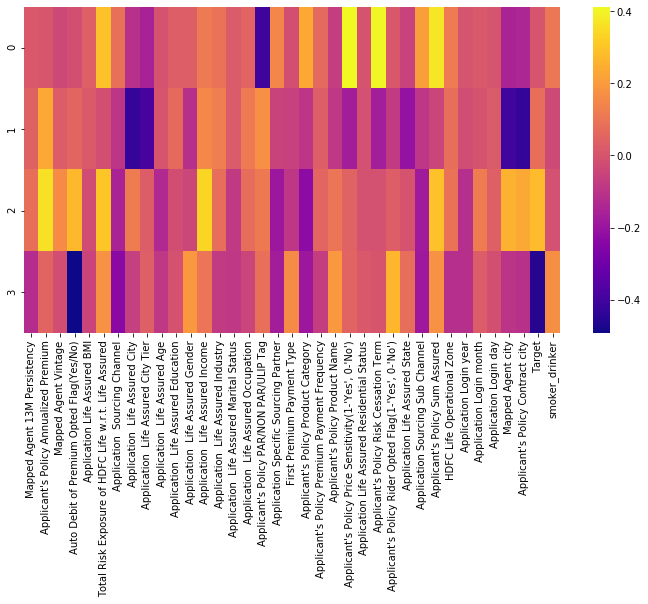

In [317]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [331]:
dff = df_comp.T

In [332]:
dff.columns = ['PC1', 'PC2', 'PC3', 'PC4']

In [333]:
dff

,PC1,PC2,PC3,PC4
Mapped Agent 13M Persistency,0.013270,0.043909,0.080975,-0.121203
Applicant's Policy Annualized Premium,0.008575,0.233320,0.362422,0.051310
Mapped Agent Vintage,-0.034425,0.029505,0.157976,-0.015310
Auto Debit of Premium Opted Flag(Yes/No),-0.012656,0.054533,0.272635,-0.491709
Application Life Assured BMI,0.036111,0.017521,-0.024525,-0.048612
Total Risk Exposure of HDFC Life w.r.t. Life Assured,0.294358,-0.012858,0.302912,0.178079
Application Sourcing Channel,0.086504,-0.093725,-0.151558,-0.234200
Application Life Assured City,-0.108300,-0.422728,0.120577,-0.063411
Application Life Assured City Tier,-0.155895,-0.389235,0.027495,0.036480
Application Life Assured Age,-0.004450,0.002943,-0.133745,-0.088046


In [334]:
pca.explained_variance_

array([4.07792041, 2.87142576, 1.99919552, 1.57879526])

In [335]:
pca.explained_variance_ratio_*100

array([11.02097123,  7.76030365,  5.40301773,  4.26684571])

In [336]:
dff.head()

,PC1,PC2,PC3,PC4
Mapped Agent 13M Persistency,0.013270,0.043909,0.080975,-0.121203
Applicant's Policy Annualized Premium,0.008575,0.233320,0.362422,0.051310
Mapped Agent Vintage,-0.034425,0.029505,0.157976,-0.015310
Auto Debit of Premium Opted Flag(Yes/No),-0.012656,0.054533,0.272635,-0.491709
Application Life Assured BMI,0.036111,0.017521,-0.024525,-0.048612


In [337]:
dff1 = dff.T

In [338]:
dff1

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker
PC1,0.013270,0.008575,-0.034425,-0.012656,0.036111,0.294358,0.086504,-0.108300,-0.155895,-0.004450,...,0.210008,0.373102,0.116954,-0.000886,0.016622,0.000646,-0.150329,-0.143757,0.006006,0.107840
PC2,0.043909,0.233320,0.029505,0.054533,0.017521,-0.012858,-0.093725,-0.422728,-0.389235,0.002943,...,-0.091897,-0.046843,0.076994,-0.020835,-0.001737,0.022993,-0.402318,-0.427389,0.078289,-0.032536
PC3,0.080975,0.362422,0.157976,0.272635,-0.024525,0.302912,-0.151558,0.120577,0.027495,-0.133745,...,-0.180471,0.294583,0.091329,-0.116767,0.121706,0.036837,0.256120,0.234097,0.278441,-0.011223
PC4,-0.121203,0.051310,-0.015310,-0.491709,-0.048612,0.178079,-0.234200,-0.063411,0.036480,-0.088046,...,-0.186469,0.178363,-0.115577,-0.110754,0.027421,-0.011684,-0.099258,-0.107529,-0.454745,0.171701


In [340]:
dff1['Mapped Agent 13M Persistency'].argmax()

'PC3'

In [341]:
PC1 = []
PC2 = []
PC3 = []
PC4 = []

In [349]:
for col in dff1.columns:
    if abs(dff1[col]).argmax() == 'PC1':
        PC1.append(col)
    elif abs(dff1[col]).argmax() == 'PC2':
        PC2.append(col)
    elif abs(dff1[col]).argmax() == 'PC3':
        PC3.append(col)
    else : 
        PC4.append(col)

In [350]:
PC1   
# More about policy takes

['Application Life Assured BMI',
 'Application  Sourcing Channel',
 'Application Specific Sourcing Partner',
 "Applicant's Policy Product Category",
 "Applicant's Policy Premium Payment Frequency",
 "Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",
 "Applicant's Policy Risk Cessation Term",
 'Application Sourcing Sub Channel',
 "Applicant's Policy Sum Assured",
 'HDFC Life Operational Zone',
 'Application Login year',
 "Applicant's Policy PAR/NON PAR/ULIP Tag",
 "Applicant's Policy Product Category",
 "Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",
 "Applicant's Policy Risk Cessation Term",
 'Application Sourcing Sub Channel',
 "Applicant's Policy Sum Assured",
 'HDFC Life Operational Zone']

In [351]:
PC2
# More about Applicants personal details

['Application  Life Assured Age',
 'Application  Life Assured Education',
 'Application  Life Assured Industry',
 'Application  Life Assured Marital Status',
 'Application  Life Assured Occupation',
 "Applicant's Policy PAR/NON PAR/ULIP Tag",
 'Application  Life Assured City',
 'Application  Life Assured City Tier',
 'Application  Life Assured Education',
 'Application  Life Assured Industry',
 'Application  Life Assured Occupation',
 'Application Life Assured State',
 'Mapped Agent city',
 "Applicant's Policy Contract city"]

In [352]:
PC3

['Mapped Agent 13M Persistency',
 "Applicant's Policy Annualized Premium",
 'Mapped Agent Vintage',
 'Auto Debit of Premium Opted Flag(Yes/No)',
 'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
 'Application  Life Assured City',
 'Application  Life Assured Income',
 'Application Login month',
 'Application Login day',
 'Mapped Agent city',
 "Applicant's Policy Contract city",
 'Target',
 "Applicant's Policy Annualized Premium",
 'Mapped Agent Vintage',
 'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
 'Application  Life Assured Age',
 'Application  Life Assured Income',
 'Application Specific Sourcing Partner',
 'Application Login year',
 'Application Login month',
 'Application Login day']

In [353]:
PC4

['Application  Life Assured City Tier',
 'Application  Life Assured Gender',
 'First Premium Payment Type',
 "Applicant's Policy Product Name",
 'Application Life Assured Residential Status',
 "Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",
 'Application Life Assured State',
 'smoker_drinker',
 'Mapped Agent 13M Persistency',
 'Auto Debit of Premium Opted Flag(Yes/No)',
 'Application Life Assured BMI',
 'Application  Sourcing Channel',
 'Application  Life Assured Gender',
 'Application  Life Assured Marital Status',
 'First Premium Payment Type',
 "Applicant's Policy Premium Payment Frequency",
 "Applicant's Policy Product Name",
 'Application Life Assured Residential Status',
 "Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",
 'Target',
 'smoker_drinker']

([<matplotlib.axis.XTick at 0x7f8f37070780>,
 <a list of 4 Text xticklabel objects>)

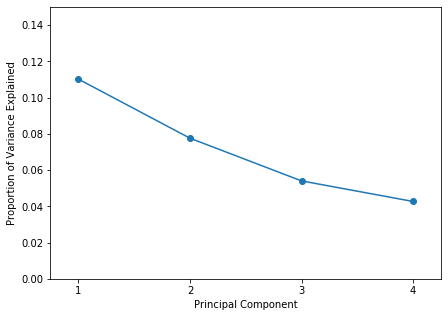

In [323]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,0.15)
plt.xticks([1,2,3,4])

In [324]:
from sklearn.cluster import KMeans

In [325]:
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit(dff)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [326]:
dff['Cluster'] = clusters.labels_

In [327]:
dff

,PC1,PC2,PC3,PC4,Cluster
Mapped Agent 13M Persistency,0.013270,0.043909,0.080975,-0.121203,1
Applicant's Policy Annualized Premium,0.008575,0.233320,0.362422,0.051310,1
Mapped Agent Vintage,-0.034425,0.029505,0.157976,-0.015310,1
Auto Debit of Premium Opted Flag(Yes/No),-0.012656,0.054533,0.272635,-0.491709,1
Application Life Assured BMI,0.036111,0.017521,-0.024525,-0.048612,1
Total Risk Exposure of HDFC Life w.r.t. Life Assured,0.294358,-0.012858,0.302912,0.178079,1
Application Sourcing Channel,0.086504,-0.093725,-0.151558,-0.234200,0
Application Life Assured City,-0.108300,-0.422728,0.120577,-0.063411,2
Application Life Assured City Tier,-0.155895,-0.389235,0.027495,0.036480,2
Application Life Assured Age,-0.004450,0.002943,-0.133745,-0.088046,0


In [328]:
dff[dff.Cluster == 0]

,PC1,PC2,PC3,PC4,Cluster
Application Sourcing Channel,0.086504,-0.093725,-0.151558,-0.234200,0
Application Life Assured Age,-0.004450,0.002943,-0.133745,-0.088046,0
Application Life Assured Marital Status,0.020943,0.022662,-0.080820,-0.085840,0
Application Specific Sourcing Partner,0.147680,-0.051733,-0.188859,-0.170986,0
Applicant's Policy Product Category,0.236673,-0.095267,-0.227455,-0.190852,0
"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",0.412085,-0.172027,0.045085,0.051330,0
Applicant's Policy Risk Cessation Term,0.403469,-0.170354,-0.008122,0.002727,0
Application Sourcing Sub Channel,0.210008,-0.091897,-0.180471,-0.186469,0
Application Login year,-0.000886,-0.020835,-0.116767,-0.110754,0


In [329]:
dff[dff.Cluster == 1]

,PC1,PC2,PC3,PC4,Cluster
Mapped Agent 13M Persistency,0.013270,0.043909,0.080975,-0.121203,1
Applicant's Policy Annualized Premium,0.008575,0.233320,0.362422,0.051310,1
Mapped Agent Vintage,-0.034425,0.029505,0.157976,-0.015310,1
Auto Debit of Premium Opted Flag(Yes/No),-0.012656,0.054533,0.272635,-0.491709,1
Application Life Assured BMI,0.036111,0.017521,-0.024525,-0.048612,1
Total Risk Exposure of HDFC Life w.r.t. Life Assured,0.294358,-0.012858,0.302912,0.178079,1
Application Life Assured Education,0.033928,0.068513,-0.018169,-0.007103,1
Application Life Assured Gender,0.032782,-0.110443,-0.042144,0.195009,1
Application Life Assured Income,0.114724,0.152355,0.337786,0.097890,1
Application Life Assured Industry,0.094338,0.125006,0.078070,-0.075266,1


In [330]:
dff[dff.Cluster == 2]

,PC1,PC2,PC3,PC4,Cluster
Application Life Assured City,-0.108300,-0.422728,0.120577,-0.063411,2
Application Life Assured City Tier,-0.155895,-0.389235,0.027495,0.036480,2
Application Life Assured State,-0.052180,-0.208114,-0.001693,0.079686,2
Mapped Agent city,-0.150329,-0.402318,0.256120,-0.099258,2
Applicant's Policy Contract city,-0.143757,-0.427389,0.234097,-0.107529,2


# K- Means

In [125]:
from sklearn.cluster import KMeans

In [166]:
k = 5
clusters = KMeans( k, random_state = 42 )
clusters.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [167]:
y = pd.DataFrame(clusters.labels_)

In [168]:
y.column = 'Cluster'

In [169]:
df2 = df.copy()

In [170]:
df2['Cluster'] = y

In [171]:
c1 = df2[df2.Cluster == 0]

In [172]:
c2 = df2[df2.Cluster == 1]

In [173]:
c3 = df2[df2.Cluster == 2]

In [174]:
c4 = df2[df2.Cluster == 3]

In [175]:
c5 = df2[df2.Cluster == 4]

In [176]:
c1['Target'].value_counts()

1    10229
0     2991
Name: Target, dtype: int64

In [177]:
c2['Target'].value_counts()

1    12
Name: Target, dtype: int64

In [150]:
c3['Target'].value_counts()

1    5722
0    1488
Name: Target, dtype: int64

In [178]:
c4['Target'].value_counts()

1    2096
0     516
Name: Target, dtype: int64

In [179]:
c5['Target'].value_counts()

1    4649
0     841
Name: Target, dtype: int64

# K-Mode

In [154]:
from kmodes.kmodes import KModes

In [159]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6746, cost: 417333.0
Run 1, iteration: 2/100, moves: 2940, cost: 414343.0
Run 1, iteration: 3/100, moves: 1787, cost: 413603.0
Run 1, iteration: 4/100, moves: 457, cost: 413540.0
Run 1, iteration: 5/100, moves: 1, cost: 413540.0


In [163]:
fitClusters_cao

array([0, 3, 1, ..., 2, 1, 2], dtype=uint16)

In [164]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns

In [165]:
clusterCentroidsDf

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker,Perf+vintage
0,80.18,50000.0,12.0,1.0,2.0,500000.0,2.0,10.0,2.0,1.0,...,500000.0,1.0,18.0,1.0,1.0,10.0,13.0,1.0,0.0,962.16
1,80.18,50000.0,4.0,1.0,2.0,5000000.0,1.0,10.0,0.0,0.0,...,5000000.0,5.0,18.0,12.0,28.0,10.0,13.0,1.0,0.0,320.72
2,80.18,100000.0,9.0,0.0,2.0,1000000.0,2.0,10.0,1.0,2.0,...,1000000.0,5.0,18.0,3.0,1.0,10.0,13.0,1.0,0.0,721.62
3,80.18,47847.0,16.0,1.0,2.0,5000000.0,2.0,10.0,2.0,2.0,...,5000000.0,1.0,18.0,3.0,28.0,10.0,13.0,1.0,0.0,881.98
4,80.18,25000.0,10.0,0.0,3.0,250000.0,1.0,10.0,0.0,3.0,...,500000.0,1.0,18.0,3.0,30.0,4.0,4.0,1.0,0.0,801.80


In [188]:
km_huang = KModes(n_clusters=5, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7944, cost: 419986.0
Run 1, iteration: 2/100, moves: 99, cost: 419986.0


In [189]:
# Predicted clusters
fitClusters_huang

array([2, 1, 0, ..., 0, 3, 0], dtype=uint16)

In [190]:
clusterCentroidsDf = pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroidsDf.columns = df.columns

In [191]:
clusterCentroidsDf

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker,Perf+vintage
0,80.18,50000.0,8.0,1.0,2.0,500000.0,2.0,10.0,1.0,2.0,...,1000000.0,5.0,18.0,12.0,1.0,10.0,13.0,1.0,0.0,641.44
1,80.18,25000.0,18.0,1.0,2.0,250000.0,2.0,10.0,2.0,1.0,...,500000.0,2.0,18.0,12.0,29.0,10.0,13.0,1.0,0.0,962.16
2,80.18,100000.0,12.0,1.0,2.0,5000000.0,2.0,2.0,0.0,3.0,...,5000000.0,3.0,18.0,3.0,30.0,3.0,3.0,1.0,0.0,962.16
3,80.18,50000.0,11.0,0.0,2.0,500000.0,2.0,10.0,2.0,3.0,...,1000000.0,1.0,18.0,1.0,1.0,10.0,13.0,1.0,0.0,881.98
4,80.18,30000.0,7.0,1.0,2.0,300000.0,2.0,10.0,2.0,1.0,...,300000.0,0.0,18.0,3.0,21.0,10.0,13.0,1.0,0.0,561.26


In [417]:
NP = df[df['Target'] == 0]

In [418]:
P = df[df['Target'] == 1]

In [419]:
NP = NP.drop('Target',axis = 1)

In [420]:
P = P.drop('Target',axis = 1)

In [401]:
df.columns

Index(['Mapped Agent 13M Persistency', 'Applicant's Policy Annualized Premium',
       'Mapped Agent Vintage', 'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Application  Life Assured City Tier', 'Application  Life Assured Age',
       'Application  Life Assured Education',
       'Application  Life Assured Gender', 'Application  Life Assured Income',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Occupation',
       'Applicant's Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant's Policy Product Category',
       'Applicant's Policy Premium Payment Frequency',
       'Applicant's Policy Product Name',
       'Applicant's Policy Price Sensitivity(1-'Yes

In [430]:
a = []
b = []

In [431]:
for i in range(len(P.columns)):
        a.append(NP.iloc[:,i].mean())

In [432]:
for j in range(len(P.columns)):
        b.append(P.iloc[:,j].mean())

In [433]:
dx = pd.DataFrame()

In [434]:
len(a)

36

In [435]:
dx['NP'] = a

In [436]:
dx['P'] = b

In [437]:
dx.index = P.columns

In [438]:
dx

,NP,P
Mapped Agent 13M Persistency,7.634366e+01,7.822451e+01
Applicant's Policy Annualized Premium,5.613681e+04,6.617417e+04
Mapped Agent Vintage,2.279722e+01,2.484416e+01
Auto Debit of Premium Opted Flag(Yes/No),9.809167e-02,7.420991e-01
Application Life Assured BMI,2.399857e+00,2.411911e+00
Total Risk Exposure of HDFC Life w.r.t. Life Assured,1.571289e+06,1.974444e+06
Application Sourcing Channel,1.932049e+00,1.891949e+00
Application Life Assured City,9.114678e+00,8.857049e+00
Application Life Assured City Tier,1.337792e+00,1.199564e+00
Application Life Assured Age,1.611557e+00,1.541572e+00


In [458]:
dx['diff'] = dx['P'] - dx['NP']

In [459]:
dx['diff'] = (dx['diff'] - dx['diff'].min())/(dx['diff'].max() - dx['diff'].min())

In [463]:
dx['diff']

Mapped Agent 13M Persistency                             0.000009
Applicant's Policy Annualized Premium                    0.024901
Mapped Agent Vintage                                     0.000010
Auto Debit of Premium Opted Flag(Yes/No)                 0.000006
Application Life Assured BMI                             0.000004
Total Risk Exposure of HDFC Life w.r.t. Life Assured     1.000000
Application  Sourcing Channel                            0.000004
Application  Life Assured City                           0.000004
Application  Life Assured City Tier                      0.000004
Application  Life Assured Age                            0.000004
Application  Life Assured Education                      0.000005
Application  Life Assured Gender                         0.000004
Application  Life Assured Income                         0.493681
Application  Life Assured Industry                       0.000005
Application  Life Assured Marital Status                 0.000004
Applicatio

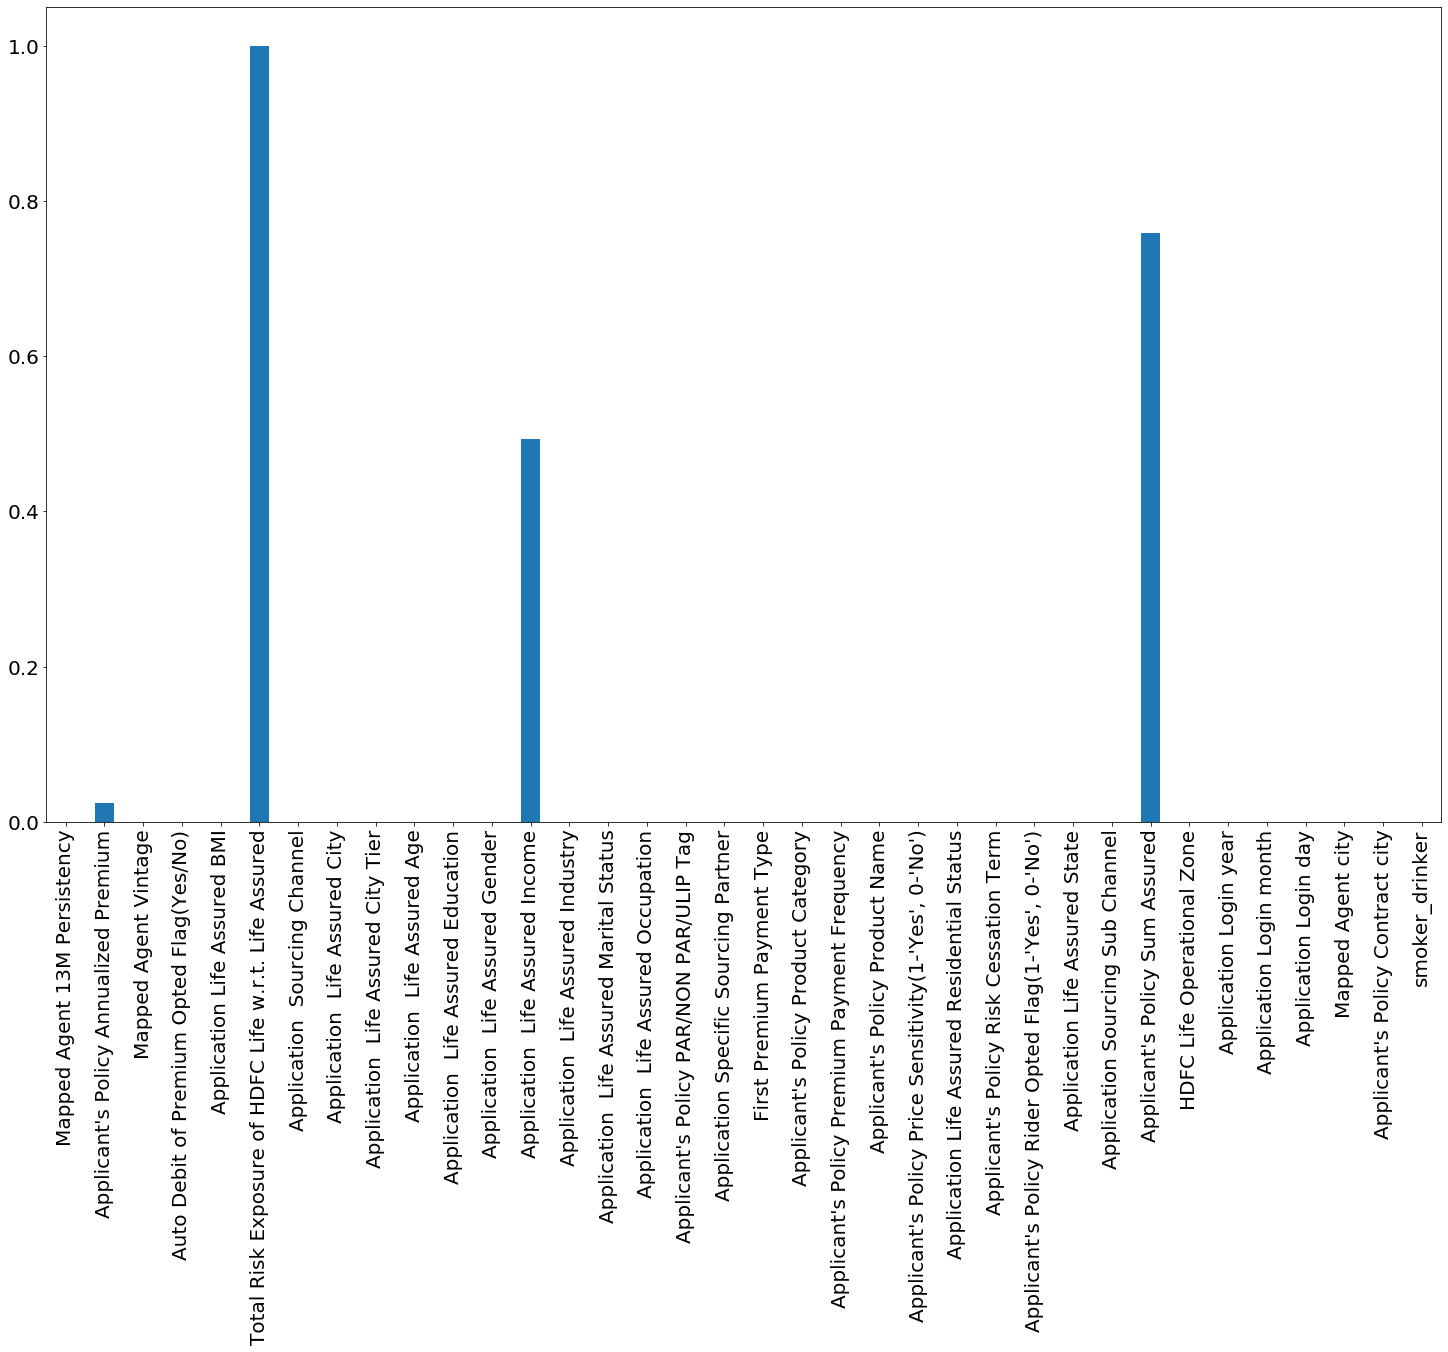

In [462]:
dx['diff'].plot(kind = 'bar', figsize = (25,15) )
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()